In [105]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [125]:
cec_data = pd.read_csv("CEC_data.csv") #choose out of "CEC_data.csv", "CEC_rural_data.csv", "CEC_urban_data.csv"

#delete irrelevant columns
cec_data = cec_data.drop(['lat','lng','info','name','year','map_name','address_1','address_2','address_3','address_4','cancelled','protocols', 'division_id','internal_id','archive_name','district_name','election_type','internal_name','abroad_district_id','election_numeric_id', 'total_registered_voters_men', 'total_registered_voters_women', 'other_votes'], axis=1)

#sum up the votes for each district by district ID
cec_data_aggregated = cec_data.groupby("district_id").sum() 

cec_data_aggregated 


,total_registered_voters,total_votes,10_votes,12_votes,16_votes,17_votes,20_votes,21_votes,23_votes,25_votes,26_votes,27_votes,3_votes,36_votes,4_votes,41_votes,5_votes,6_votes,8_votes,9_votes
district_id,,,,,,,,,,,,,,,,,,,,
1,53540,35404,331,23,202,37,82,48,47,3863,13,71,41,1739,5456,14699,2485,80,1054,5133
2,110528,76225,592,74,373,99,148,84,106,9178,52,160,75,4609,12308,28997,5082,189,1935,12164
3,143099,95011,981,47,539,116,203,109,143,11335,53,194,98,5648,14581,37705,6590,238,2811,13620
4,42028,22536,209,16,119,40,38,33,24,2054,13,45,35,939,2901,11002,2175,56,625,2212
5,117408,63720,678,76,564,120,152,155,72,6798,125,143,115,3003,8555,28778,5465,186,1980,6755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,66235,40422,100,71,180,56,108,64,38,2337,13,70,130,520,2207,25426,6510,161,621,1810
82,14454,9523,16,13,23,3,13,10,21,543,6,26,19,157,684,5905,1425,57,68,534
83,43271,27383,68,56,116,41,80,54,61,2157,15,35,74,377,1541,16495,4308,120,405,1380


In [126]:
# delete the columns with total registered voters and total votes, and change the indexing of the rows
cec_data_votesonly = cec_data_aggregated.drop(['total_registered_voters', 'total_votes'], axis=1)
cec_data_votesonly = cec_data_votesonly.reset_index().drop('district_id', axis=1)

# Tally second digit of each entry 
tally = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0}

for i in range(cec_data_votesonly.shape[0]):
    for j in range(cec_data_votesonly.shape[1]):
        entry = cec_data_votesonly.iloc[i,j]
        if entry < 10:
            pass
        else:
            first_digit = str(int(abs(entry)))[1]
            tally[first_digit] += 1
            
# Print the tallies
for digit in sorted(tally.keys()):
    print(f"tally{digit}: {tally[digit]}")
    

tally0: 150
tally1: 139
tally2: 138
tally3: 110
tally4: 130
tally5: 113
tally6: 101
tally7: 116
tally8: 112
tally9: 101


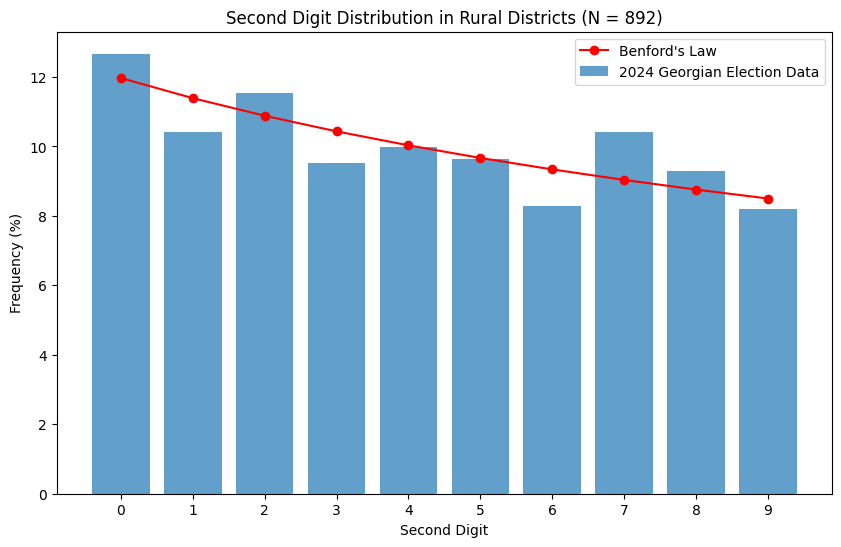

In [123]:
# Calculate total counts
total_count = sum(tally.values())

# Use Benford's Law expected proportions
benford_probs = [(sum([np.log10(1 + 1/(10*k + d)) for k in range(1, 10)])) for d in range(0, 10)]
benford_counts = [p * 100  for p in benford_probs]

# Prepare data for plotting
digits = [str(d) for d in range(0, 10)]
observed_counts = [100*tally[str(d)]/total_count for d in range(0, 10)]

# Plot observed vs expected frequencies
plt.figure(figsize=(10, 6))
plt.bar(digits, observed_counts, alpha=0.7, label='2024 Georgian Election Data')
plt.plot(digits, benford_counts, 'ro-', label='Benford\'s Law')
plt.xlabel('Second Digit')
plt.ylabel('Frequency (%)')
plt.title('Second Digit Distribution in Rural Districts (N = {})'.format(total_count))
plt.legend()
plt.show()


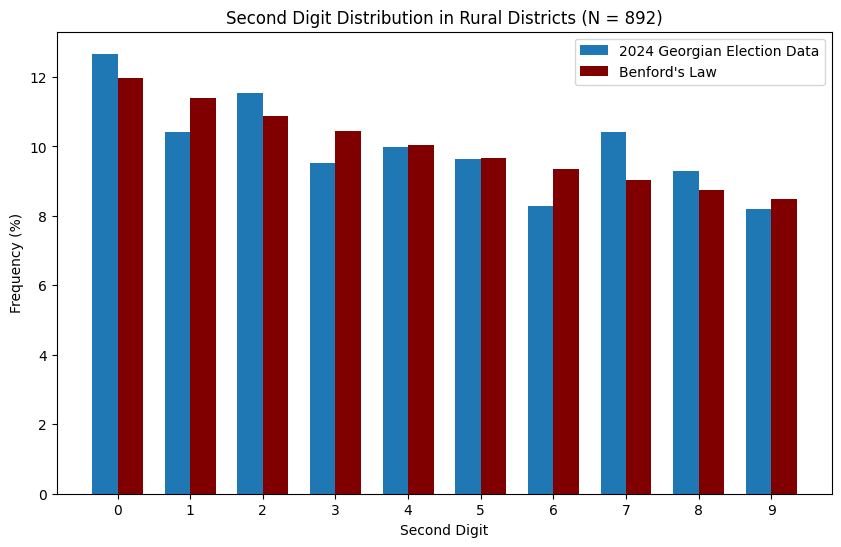

In [124]:
# Define the first digits and the observed and expected counts
digits = np.arange(0, 10)

# Set the width for each bar
bar_width = 0.35

# Set the positions for each bar on the x-axis
r1 = np.arange(len(digits))
r2 = [x + bar_width for x in r1]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot observed counts
plt.bar(r1, observed_counts, width=bar_width, label='2024 Georgian Election Data')

# Plot expected counts
plt.bar(r2, benford_counts, color = 'maroon', width=bar_width, label='Benford\'s Law')

# Add labels and title
plt.xlabel('Second Digit')
plt.ylabel('Frequency (%)')
plt.title('Second Digit Distribution in Rural Districts (N = {})'.format(total_count))
plt.xticks([r + bar_width / 2 for r in range(len(digits))], digits)  # Center x-ticks between bars

# Add a legend
plt.legend()

# Show the plot
plt.show()


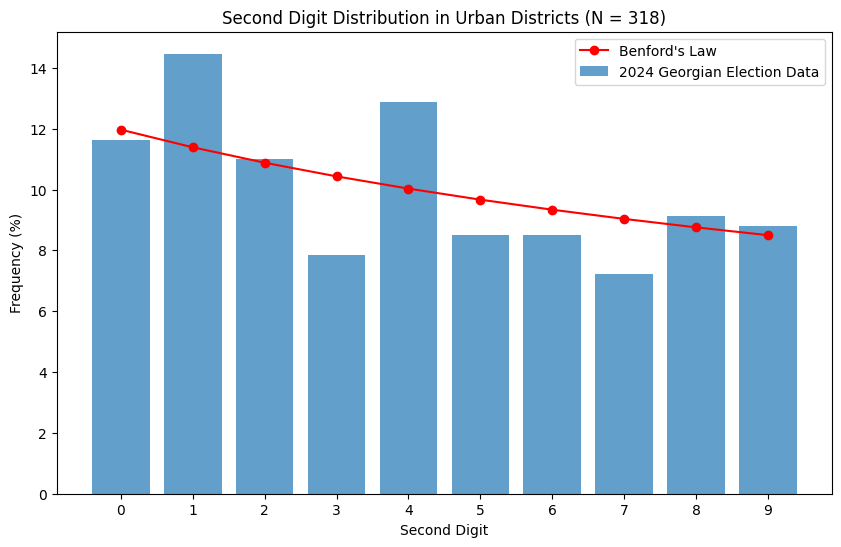

In [120]:
# Calculate total counts
total_count = sum(tally.values())

# Use Benford's Law expected proportions
benford_probs = [(sum([np.log10(1 + 1/(10*k + d)) for k in range(1, 10)])) for d in range(0, 10)]
benford_counts = [p * 100  for p in benford_probs]

# Prepare data for plotting
digits = [str(d) for d in range(0, 10)]
observed_counts = [100*tally[str(d)]/total_count for d in range(0, 10)]

# Plot observed vs expected frequencies
plt.figure(figsize=(10, 6))
plt.bar(digits, observed_counts, alpha=0.7, label='2024 Georgian Election Data')
plt.plot(digits, benford_counts, 'ro-', label='Benford\'s Law')
plt.xlabel('Second Digit')
plt.ylabel('Frequency (%)')
plt.title('Second Digit Distribution in Urban Districts (N = {})'.format(total_count))
plt.legend()
plt.show()


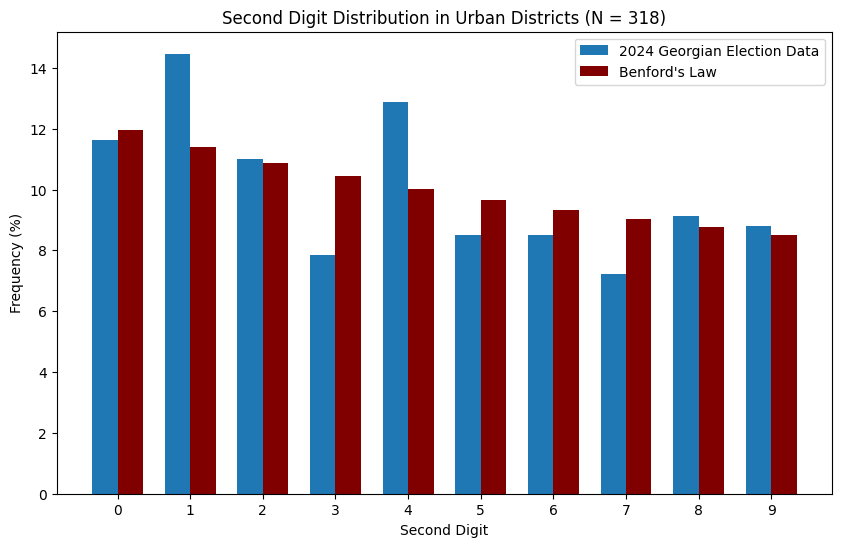

In [119]:
# Define the first digits and the observed and expected counts
digits = np.arange(0, 10)

# Set the width for each bar
bar_width = 0.35

# Set the positions for each bar on the x-axis
r1 = np.arange(len(digits))
r2 = [x + bar_width for x in r1]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot observed counts
plt.bar(r1, observed_counts, width=bar_width, label='2024 Georgian Election Data')

# Plot expected counts
plt.bar(r2, benford_counts, color = 'maroon', width=bar_width, label='Benford\'s Law')

# Add labels and title
plt.xlabel('Second Digit')
plt.ylabel('Frequency (%)')
plt.title('Second Digit Distribution in Urban Districts (N = {})'.format(total_count))
plt.xticks([r + bar_width / 2 for r in range(len(digits))], digits)  # Center x-ticks between bars

# Add a legend
plt.legend()

# Show the plot
plt.show()


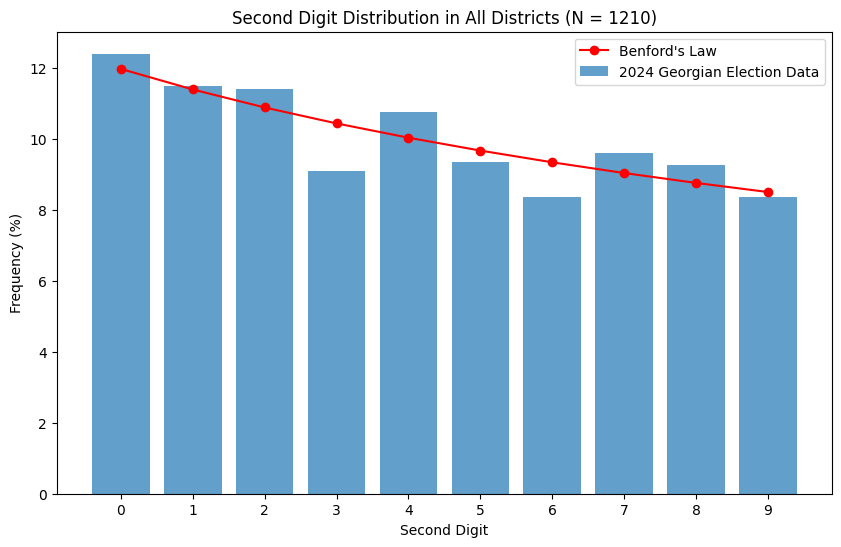

In [127]:
# Calculate total counts
total_count = sum(tally.values())

# Use Benford's Law expected proportions
benford_probs = [(sum([np.log10(1 + 1/(10*k + d)) for k in range(1, 10)])) for d in range(0, 10)]
benford_counts = [p * 100  for p in benford_probs]

# Prepare data for plotting
digits = [str(d) for d in range(0, 10)]
observed_counts = [100*tally[str(d)]/total_count for d in range(0, 10)]

# Plot observed vs expected frequencies
plt.figure(figsize=(10, 6))
plt.bar(digits, observed_counts, alpha=0.7, label='2024 Georgian Election Data')
plt.plot(digits, benford_counts, 'ro-', label='Benford\'s Law')
plt.xlabel('Second Digit')
plt.ylabel('Frequency (%)')
plt.title('Second Digit Distribution in All Districts (N = {})'.format(total_count))
plt.legend()
plt.show()


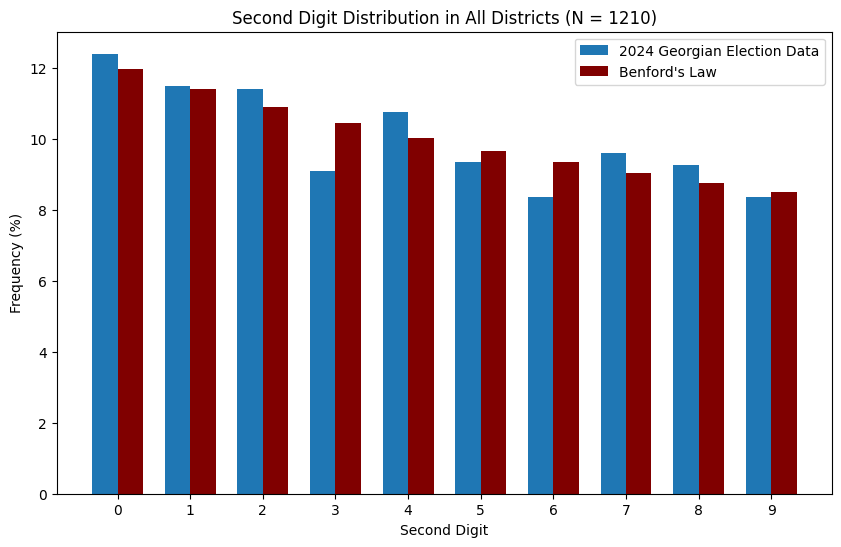

In [128]:
# Define the first digits and the observed and expected counts
digits = np.arange(0, 10)

# Set the width for each bar
bar_width = 0.35

# Set the positions for each bar on the x-axis
r1 = np.arange(len(digits))
r2 = [x + bar_width for x in r1]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot observed counts
plt.bar(r1, observed_counts, width=bar_width, label='2024 Georgian Election Data')

# Plot expected counts
plt.bar(r2, benford_counts, color = 'maroon', width=bar_width, label='Benford\'s Law')

# Add labels and title
plt.xlabel('Second Digit')
plt.ylabel('Frequency (%)')
plt.title('Second Digit Distribution in All Districts (N = {})'.format(total_count))
plt.xticks([r + bar_width / 2 for r in range(len(digits))], digits)  # Center x-ticks between bars

# Add a legend
plt.legend()

# Show the plot
plt.show()
